# 05 - BackTesting

In [10]:
# imports
import pandas as pd
import numpy as np
import joblib
import os
from sklearn.metrics import brier_score_loss

#notebook settings
pd.set_option('display.max_columns', None)

In [11]:
# load the model
# Load the model from the file
filename = os.path.join('..','models','final_model_pipeline.pkl')
loaded_model = joblib.load(filename)


In [12]:
# load X_test, y_test and back testing data
X_test = pd.read_csv(os.path.join('..','data','processed','X_test.csv'))
y_test = pd.read_csv(os.path.join('..','data','processed','y_test.csv'))
data_for_back_testing = pd.read_csv(os.path.join('..','data','processed','data_for_back_testing.csv'))

# make predictions
y_pred = loaded_model.predict(X_test)

In [13]:
X_test.head()

,home_team,away_team,day_of_week,month,day_of_week_sin,day_of_week_cos,month_sin,month_cos,home_roll_3_avg_home_corners,away_roll_3_avg_home_corners,home_roll_3_avg_away_corners,away_roll_3_avg_away_corners,home_roll_3_avg_home_yellow_cards,away_roll_3_avg_home_yellow_cards,home_roll_3_avg_away_yellow_cards,away_roll_3_avg_away_yellow_cards,home_roll_3_avg_home_red_cards,away_roll_3_avg_home_red_cards,home_roll_3_avg_away_red_cards,away_roll_3_avg_away_red_cards,home_roll_3_avg_ratio_h_a_shots,away_roll_3_avg_ratio_h_a_shots,home_roll_3_avg_ratio_h_a_fouls,away_roll_3_avg_ratio_h_a_fouls,home_roll_3_avg_ratio_a_h_shots,away_roll_3_avg_ratio_a_h_shots,home_roll_3_avg_ratio_a_h_fouls,away_roll_3_avg_ratio_a_h_fouls,home_roll_5_avg_home_corners,away_roll_5_avg_home_corners,home_roll_5_avg_away_corners,away_roll_5_avg_away_corners,home_roll_5_avg_home_yellow_cards,away_roll_5_avg_home_yellow_cards,home_roll_5_avg_away_yellow_cards,away_roll_5_avg_away_yellow_cards,home_roll_5_avg_home_red_cards,away_roll_5_avg_home_red_cards,home_roll_5_avg_away_red_cards,away_roll_5_avg_away_red_cards,home_roll_5_avg_ratio_h_a_shots,away_roll_5_avg_ratio_h_a_shots,home_roll_5_avg_ratio_a_h_shots,away_roll_5_avg_ratio_a_h_shots,home_cumulative_points,away_cumulative_points
0,watford,norwich,5,12,-0.866025,0.5,-2.449294e-16,1.000000e+00,4.666667,7.000000,7.000000,5.333333,2.000000,1.333333,1.000000,2.333333,0.0,0.0,0.333333,0.333333,1.246606,3.353704,0.916667,0.547009,1.275000,0.688312,1.280303,2.416667,4.2,6.8,5.6,4.6,2.2,1.0,1.6,1.8,0.2,0.0,0.2,0.2,1.360464,2.906865,1.072451,0.642278,11,5
1,west ham,sunderland,5,4,-0.866025,0.5,8.660254e-01,-5.000000e-01,6.666667,7.333333,5.000000,3.333333,0.666667,0.333333,3.000000,2.000000,0.0,0.0,0.333333,0.000000,2.005556,2.446032,0.605859,0.912169,0.611111,0.521364,1.832112,1.156061,6.4,6.6,4.6,4.4,0.8,0.8,2.4,1.6,0.0,0.2,0.4,0.4,2.063651,2.250476,0.575128,0.520394,22,7
2,bournemouth,sunderland,5,9,-0.866025,0.5,-1.000000e+00,-1.836970e-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,4,1
3,nottm forest,bournemouth,5,9,-0.866025,0.5,-1.000000e+00,-1.836970e-16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,3,3
4,west ham,burnley,5,3,-0.866025,0.5,1.000000e+00,6.123234e-17,6.333333,5.000000,4.333333,2.666667,1.666667,1.000000,1.666667,2.000000,0.0,0.0,0.000000,0.000000,1.038721,1.440268,1.149206,1.237037,1.055556,0.779879,0.958333,0.841667,5.6,6.4,4.0,2.8,1.8,1.6,1.6,2.8,0.0,0.0,0.0,0.0,1.228687,2.452040,0.902969,1.227347,19,21


In [14]:
# what are the probability of the model predicting the target variable
y_pred_proba = loaded_model.predict_proba(X_test)
display(y_pred_proba)

# what are the team names that goint to win
y_pred = loaded_model.predict(X_test)
display(y_pred)

array([[1.9646646e-01, 1.7824243e-01, 6.2529111e-01],
       [9.1857597e-02, 6.1219234e-02, 8.4692317e-01],
       [1.7932464e-03, 6.0056353e-01, 3.9764321e-01],
       ...,
       [2.3506339e-04, 5.4162424e-03, 9.9434870e-01],
       [1.4019476e-01, 5.2518405e-02, 8.0728686e-01],
       [1.4167182e-01, 2.0474587e-01, 6.5358233e-01]], dtype=float32)

array([2, 2, 1, ..., 2, 2, 2])

In [15]:
print(data_for_back_testing.shape)
data_for_back_testing.head()

(7330, 3)


,implied_home_win_prob,implied_draw_prob,implied_away_win_prob
0,0.404145,0.286010,0.309845
1,0.185958,0.273467,0.540575
2,0.391387,0.285412,0.323201
3,0.540575,0.273467,0.185958
4,0.323341,0.289997,0.386662


In [16]:
y_pred_proba

array([[1.9646646e-01, 1.7824243e-01, 6.2529111e-01],
       [9.1857597e-02, 6.1219234e-02, 8.4692317e-01],
       [1.7932464e-03, 6.0056353e-01, 3.9764321e-01],
       ...,
       [2.3506339e-04, 5.4162424e-03, 9.9434870e-01],
       [1.4019476e-01, 5.2518405e-02, 8.0728686e-01],
       [1.4167182e-01, 2.0474587e-01, 6.5358233e-01]], dtype=float32)

In [17]:
# Create a DataFrame to store team names and y_true values
team_names = X_test.loc[:, ['home_team', 'away_team']].copy()

#add the tru labels
team_names['true_results'] = y_test

# Add predicted results to the DataFrame decoded from the label encoding
team_names['predicted_results'] = y_pred


# Unpack y_pred_proba (probabilities for [Away, Draw, Home])
team_names[['away_prob', 'draw_prob', 'home_prob']] = pd.DataFrame(y_pred_proba, index=team_names.index)

# Ensure index alignment between team_names and data_for_back_testing for implied probabilities
team_names[['implied_home_win_prob', 'implied_draw_prob', 'implied_away_win_prob']] = data_for_back_testing.loc[team_names.index, ['implied_home_win_prob', 'implied_draw_prob', 'implied_away_win_prob']]

# Reorder columns for better readability
team_names = team_names[['home_team', 'away_team', 'true_results','predicted_results', 
                         'home_prob', 'draw_prob', 'away_prob', 
                         'implied_home_win_prob', 'implied_draw_prob', 
                         'implied_away_win_prob']]


# Print column names to ensure everything is added correctly
print(team_names.columns)

# Display the first few rows of the DataFrame
team_names.head()

Index(['home_team', 'away_team', 'true_results', 'predicted_results',
       'home_prob', 'draw_prob', 'away_prob', 'implied_home_win_prob',
       'implied_draw_prob', 'implied_away_win_prob'],
      dtype='object')


,home_team,away_team,true_results,predicted_results,home_prob,draw_prob,away_prob,implied_home_win_prob,implied_draw_prob,implied_away_win_prob
0,watford,norwich,2,2,0.625291,0.178242,0.196466,0.404145,0.286010,0.309845
1,west ham,sunderland,2,2,0.846923,0.061219,0.091858,0.185958,0.273467,0.540575
2,bournemouth,sunderland,2,1,0.397643,0.600564,0.001793,0.391387,0.285412,0.323201
3,nottm forest,bournemouth,0,2,0.548986,0.021317,0.429698,0.540575,0.273467,0.185958
4,west ham,burnley,0,0,0.204430,0.267486,0.528085,0.323341,0.289997,0.386662


In [18]:
# Define a function to calculate the Brier score using sklearn
def calculate_brier_score(predictions, true_outcome):
    return brier_score_loss(true_outcome, predictions)

# Add the one-hot encoded true predictions as a new column based on 'true_results'
def encode_result(result):
    # 'H' = [1, 0, 0], 'D' = [0, 1, 0], 'A' = [0, 0, 1]
    if result == 2:
        return [1, 0, 0]
    elif result == 1:
        return [0, 1, 0]
    elif result == 0:
        return [0, 0, 1]

team_names['true_predictions_brier'] = team_names['true_results'].apply(encode_result)

# Now calculate the Brier score for each row using the predicted probabilities
team_names['brier_score_market'] = team_names.apply(
    lambda row: calculate_brier_score(np.array([row['home_prob'], row['draw_prob'], row['away_prob']]), row['true_predictions_brier']),
    axis=1
)

# Calculate the Brier score for the model
team_names['brier_score_model'] = team_names.apply(
    lambda row: calculate_brier_score(np.array([row['implied_home_win_prob'], row['implied_draw_prob'], row['implied_away_win_prob']]), row['true_predictions_brier']),
    axis=1
)

# Optionally, calculate the average Brier score for the entire dataset
average_brier_score_market = team_names['brier_score_market'].mean()
average_brier_score_model = team_names['brier_score_model'].mean()

# Encode predicted_results to H, D, A
def decode_result(result):
    if result == 2:
        return 'H'
    elif result == 1:
        return 'D'
    elif result == 0:
        return 'A'
    
team_names['predicted_results'] = team_names['predicted_results'].apply(decode_result)

# Display the Brier score for each row and the average Brier score
display(team_names[['home_team', 'away_team', 'true_results', 'predicted_results', 'brier_score_model', 'brier_score_market']])
print(f"Average Brier Score Market: {average_brier_score_market}")
print(f"Average Brier Score Model: {average_brier_score_model}")

,home_team,away_team,true_results,predicted_results,brier_score_model,brier_score_market
0,watford,norwich,2,H,0.177616,0.070259
1,west ham,sunderland,2,H,0.343223,0.011873
2,bournemouth,sunderland,2,D,0.185443,0.241171
3,nottm forest,bournemouth,0,H,0.343223,0.209028
4,west ham,burnley,0,A,0.188277,0.112015
...,...,...,...,...,...,...
1461,wolves,southampton,2,H,0.151064,0.030089
1462,swansea,everton,0,A,0.236278,0.042616
1463,arsenal,sheffield united,2,H,0.127527,0.000020
1464,crystal palace,burnley,0,H,0.385645,0.464578


Average Brier Score Market: 0.16149237388332227
Average Brier Score Model: 0.23456376316600624


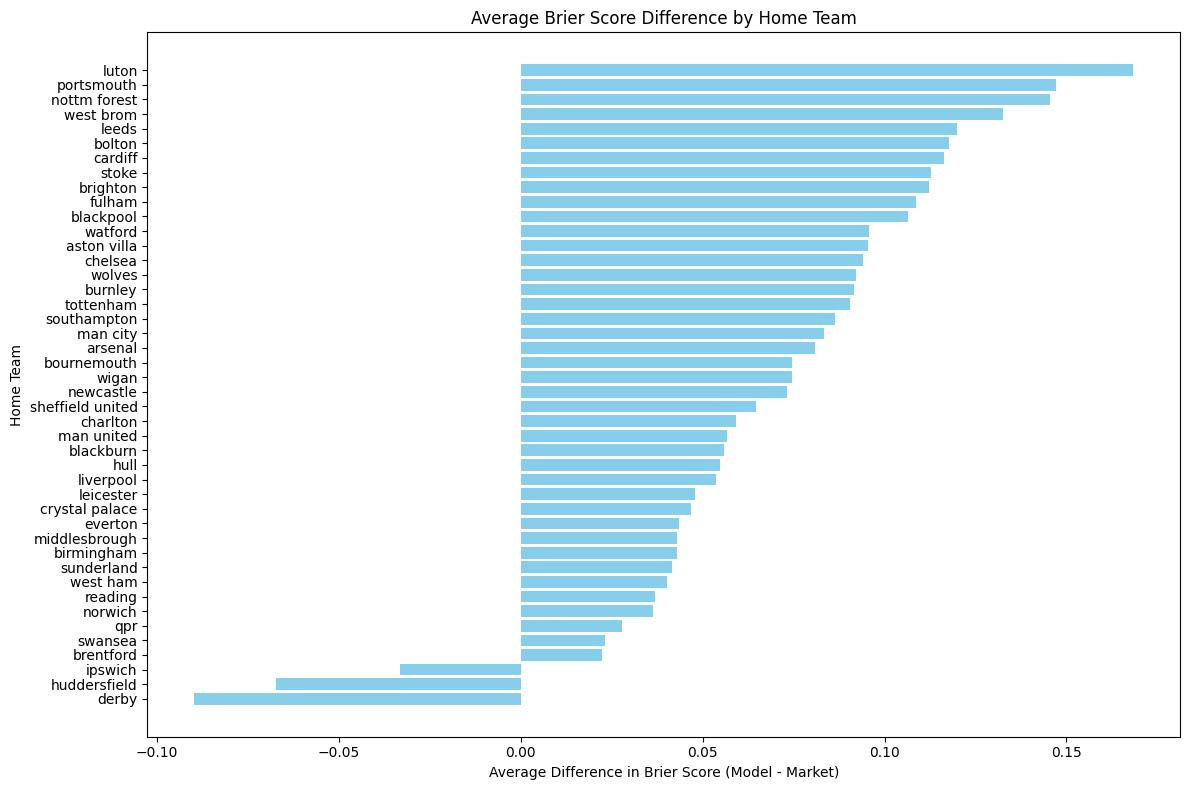

In [25]:
import matplotlib.pyplot as plt

team_diff = team_names.groupby('home_team')[['brier_score_model', 'brier_score_market']].mean()
team_diff['brier_score_difference'] = team_diff['brier_score_model'] - team_diff['brier_score_market']
team_diff = team_diff.sort_values('brier_score_difference')

# Plot
plt.figure(figsize=(12, 8))
plt.barh(team_diff.index, team_diff['brier_score_difference'], color='skyblue')
plt.xlabel('Average Difference in Brier Score (Model - Market)')
plt.ylabel('Home Team')
plt.title('Average Brier Score Difference by Home Team')
plt.tight_layout()
plt.show()

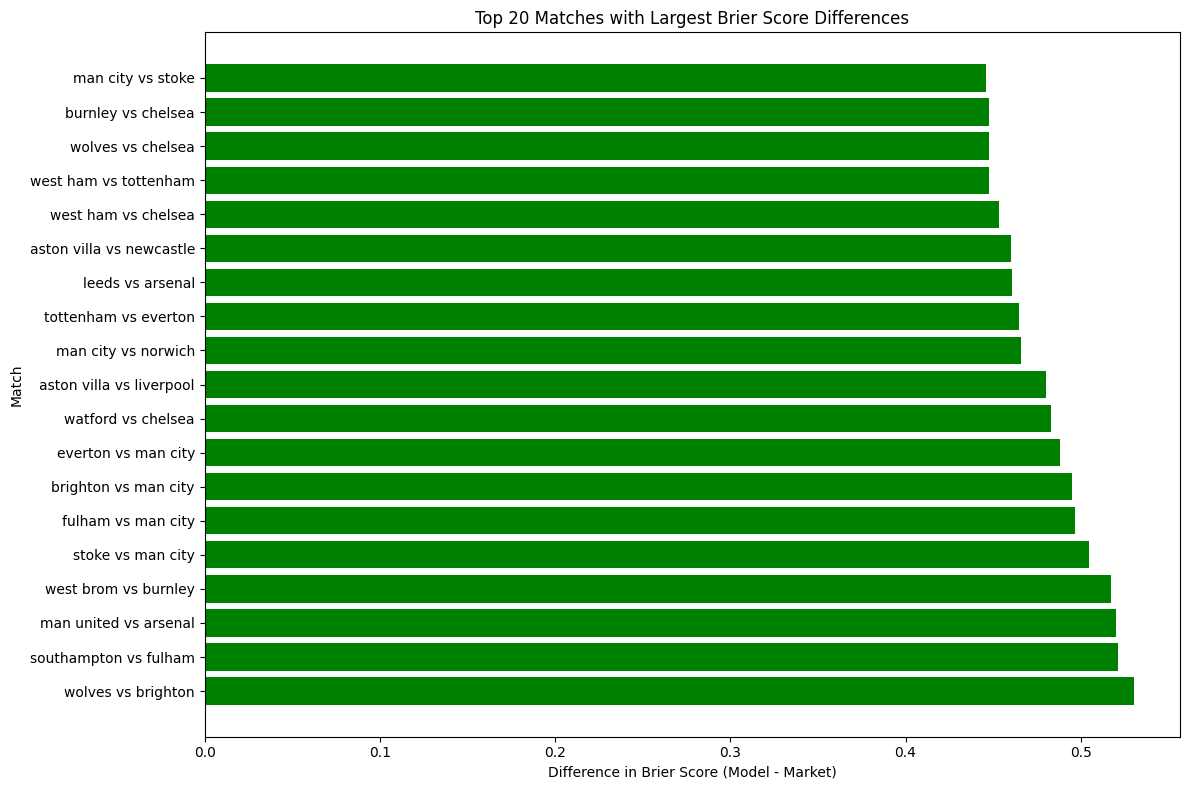

In [26]:
# Compute differences
team_names['brier_score_difference'] = team_names['brier_score_model'] - team_names['brier_score_market']

# Filter top 20 matches with highest differences
top_matches = team_names.nlargest(20, 'brier_score_difference')

# Plot
plt.figure(figsize=(12, 8))
plt.barh(top_matches['home_team'] + ' vs ' + top_matches['away_team'], top_matches['brier_score_difference'], color='green')
plt.xlabel('Difference in Brier Score (Model - Market)')
plt.ylabel('Match')
plt.title('Top 20 Matches with Largest Brier Score Differences')
plt.tight_layout()
plt.show()

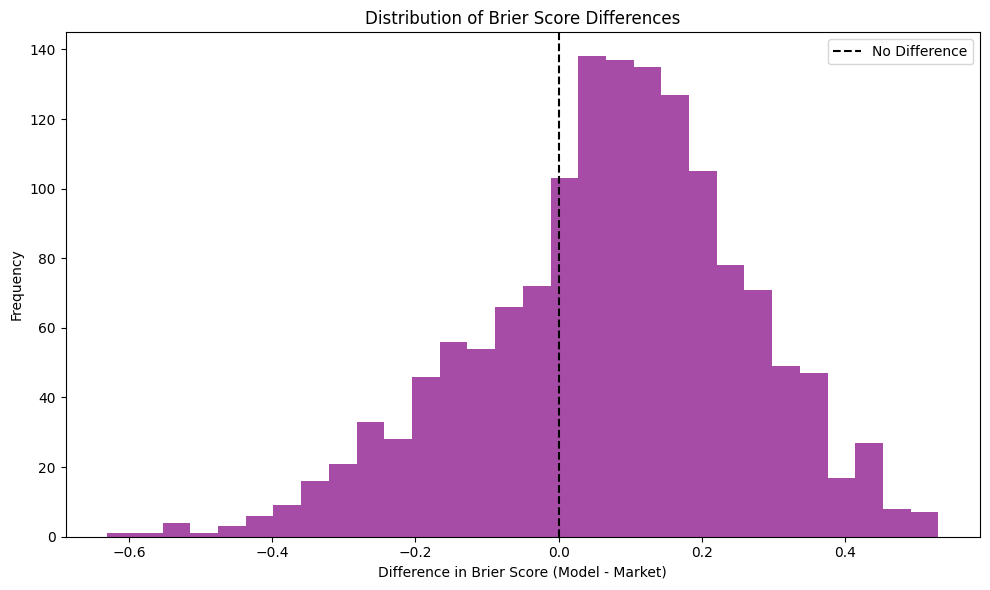

In [27]:
plt.figure(figsize=(10, 6))
plt.hist(team_names['brier_score_difference'], bins=30, color='purple', alpha=0.7)
plt.axvline(0, color='black', linestyle='--', label='No Difference')
plt.xlabel('Difference in Brier Score (Model - Market)')
plt.ylabel('Frequency')
plt.title('Distribution of Brier Score Differences')
plt.legend()
plt.tight_layout()
plt.show()

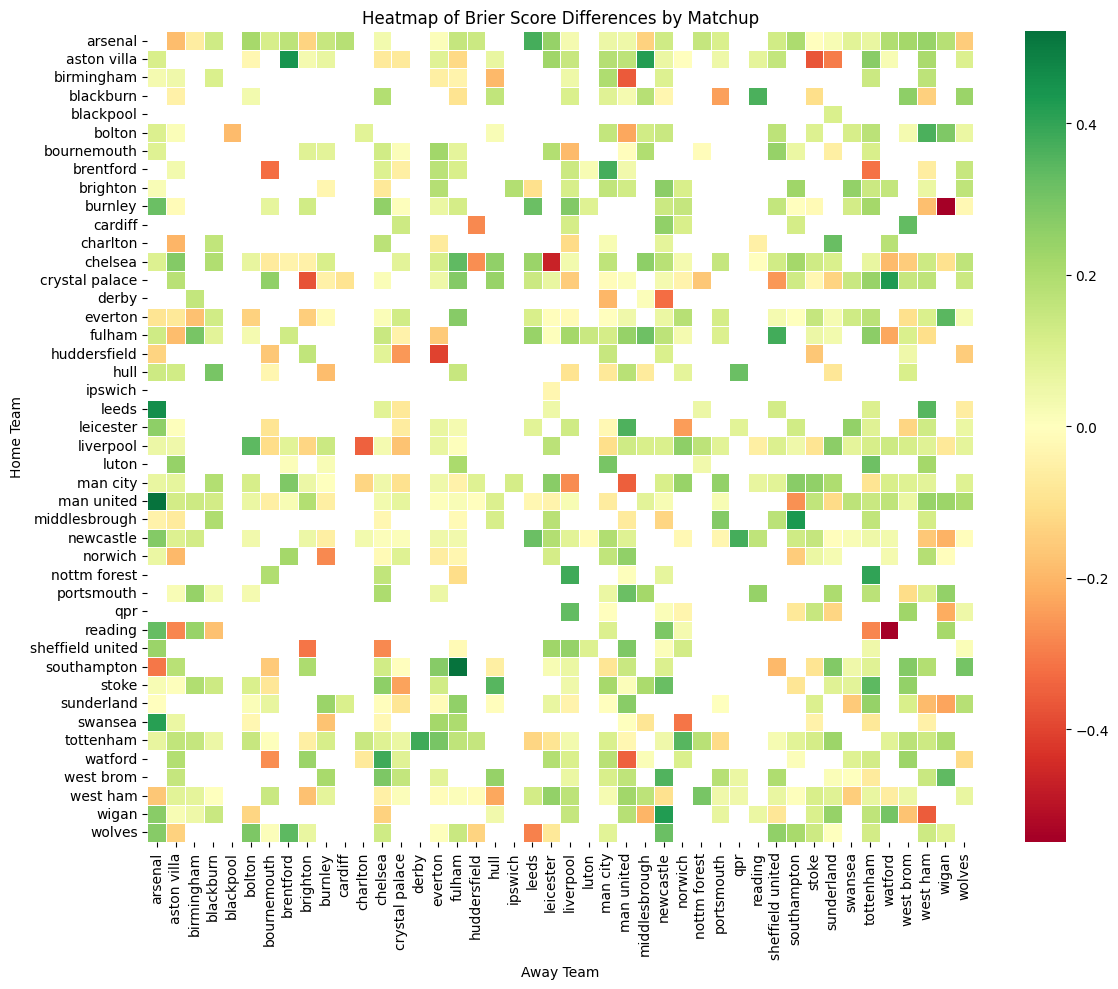

In [28]:
import seaborn as sns

# Pivot table for heatmap
heatmap_data = team_names.pivot_table(index='home_team', columns='away_team', values='brier_score_difference', aggfunc='mean')

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(heatmap_data, annot=False, cmap='RdYlGn', center=0, linewidths=.5)
plt.title('Heatmap of Brier Score Differences by Matchup')
plt.xlabel('Away Team')
plt.ylabel('Home Team')
plt.tight_layout()
plt.show()